In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

madera mx
rikitea pf
pisco pe
mocambique mz
airai pw
nakhon sawan th
hilo us
cape town za
ayan ru
surprise us
amderma ru
fare pf
punta arenas cl
dubrovka ru
vaini to
qaanaaq gl
goderich sl
ushuaia ar
esperance au
sentyabrskiy ru
atuona pf
nome us
upernavik gl
wolmaranstad za
lebu cl
barrow us
kodiak us
hermanus za
ahuimanu us
hofn is
cape town za
taolanaro mg
moose factory ca
dhidhdhoo mv
taolanaro mg
nikolskoye ru
rikitea pf
constitucion mx
punta arenas cl
santa cruz cr
longyearbyen sj
rikitea pf
mataura pf
sao filipe cv
mezhdurechensk ru
avarua ck
shache cn
amderma ru
cayenne gf
palmer us
grand river south east mu
aksu cn
chokurdakh ru
ushuaia ar
punta arenas cl
jamestown sh
norman wells ca
bluff nz
moncton ca
portland au
thompson ca
thompson ca
kurumkan ru
tubruq ly
fairbanks us
zalantun cn
paragominas br
hermanus za
juneau us
ixtapa mx
bud no
kaitangata nz
camacha pt
kodiak us
oshikango na
ribeira grande pt
rodrigues alves br
marondera zw
vaitupu wf
boa vista br
chicama pe
laguna b

cape town za
vila franca do campo pt
rorvik no
tasiilaq gl
ushuaia ar
mar del plata ar
pacific grove us
yaan cn
tuktoyaktuk ca
georgetown sh
khatanga ru
jamestown sh
provideniya ru
codrington ag
port alfred za
rikitea pf
ushuaia ar
provideniya ru
busselton au
butaritari ki
tonneins fr
taltal cl
severo-kurilsk ru
mataura pf
san patricio mx
husavik is
puerto princesa ph
taolanaro mg
ushuaia ar
barentsburg sj
fallon us
ushuaia ar
norman wells ca
victoria sc
ibra om
wagar sd
meulaboh id
port hardy ca
barrow us
hobart au
rikitea pf
rudbar af
tasiilaq gl
ushuaia ar
fortuna us
palabuhanratu id
cabo san lucas mx
qaanaaq gl
chokurdakh ru
longyearbyen sj
ushuaia ar
atuona pf
dikson ru
lethem gy
taolanaro mg
bugasong ph
ilulissat gl
bolshiye uki ru
kahului us
geraldton au
udachnyy ru
ilulissat gl
attawapiskat ca
busselton au
rikitea pf
neuquen ar
ushuaia ar
ambilobe mg
aklavik ca
barrow us
alice springs au
mys shmidta ru
itarema br
saldanha za
punta arenas cl
rikitea pf
khonuu ru
saint-philippe r

arraial do cabo br
nizhneyansk ru
puerto ayora ec
hami cn
ilam np
busselton au
ushtobe kz
channel-port aux basques ca
ushuaia ar
punta arenas cl
novobirilyussy ru
banda aceh id
kaitangata nz
kolosovka ru
bluff nz
mar del plata ar
fare pf
mys shmidta ru
nome us
vaini to
dakar sn
tiarei pf
castro cl
punta arenas cl
punta arenas cl
clyde river ca
port alfred za
jamestown sh
tungkang tw
hilo us
kodiak us
vaini to
rikitea pf
tianpeng cn
tasiilaq gl
kapaa us
fairbanks us
jamestown sh
gebre guracha et
mataura pf
luderitz na
lamu ke
saint-philippe re
tambopata pe
bambous virieux mu
hithadhoo mv
bosaso so
camacha pt
beloha mg
lompoc us
punta arenas cl
yellowknife ca
ponnampet in
kapaa us
mataura pf
mys shmidta ru
nieuw amsterdam sr
rikitea pf
vaini to
puerto ayora ec
lata sb
matay eg
lubango ao
cidreira br
touros br
bredasdorp za
illoqqortoormiut gl
mataura pf
puerto ayora ec
talaya ru
castro cl
tiksi ru
yellowknife ca
hambantota lk
tasiilaq gl
husavik is
tucurui br
bluff nz
bathsheba bb
port e

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b5a8aebcead09ee9bf6bec005d03b6ad


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | rawson
Processing Record 4 of Set 1 | faya
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | ayan
Processing Record 7 of Set 1 | catalina
Processing Record 8 of Set 1 | henties bay
Processing Record 9 of Set 1 | tazovskiy
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | emirdag
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | hammonton
Processing Record 21 of Set 1 | hanamaki
Processing Record 22 of Set 1 | balikpapan
Processing Record 23 of Set 1 | victoria
Processing Record 24 of Set 1 | fo

Processing Record 43 of Set 4 | port hardy
Processing Record 44 of Set 4 | almeirim
Processing Record 45 of Set 4 | fuyu
Processing Record 46 of Set 4 | sorland
Processing Record 47 of Set 4 | coihaique
Processing Record 48 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 49 of Set 4 | nishihara
Processing Record 50 of Set 4 | khingansk
Processing Record 1 of Set 5 | murray bridge
Processing Record 2 of Set 5 | mar del plata
Processing Record 3 of Set 5 | viedma
Processing Record 4 of Set 5 | aljezur
Processing Record 5 of Set 5 | tuatapere
Processing Record 6 of Set 5 | banda aceh
Processing Record 7 of Set 5 | mulino
Processing Record 8 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 9 of Set 5 | tapes
Processing Record 10 of Set 5 | prudentopolis
Processing Record 11 of Set 5 | sisophon
Processing Record 12 of Set 5 | saint-joseph
Processing Record 13 of Set 5 | zhuhai
Processing Record 14 of Set 5 | ust-kuyga
Processing Record 15 of Set 5 | kavi

Processing Record 29 of Set 8 | broome
Processing Record 30 of Set 8 | vangaindrano
Processing Record 31 of Set 8 | harper
Processing Record 32 of Set 8 | kamenka
Processing Record 33 of Set 8 | tam ky
Processing Record 34 of Set 8 | banepa
Processing Record 35 of Set 8 | lagoa
Processing Record 36 of Set 8 | airai
Processing Record 37 of Set 8 | halalo
City not found. Skipping...
Processing Record 38 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 39 of Set 8 | weihai
Processing Record 40 of Set 8 | batagay-alyta
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | youkounkoun
Processing Record 43 of Set 8 | nantucket
Processing Record 44 of Set 8 | buluang
Processing Record 45 of Set 8 | hue
Processing Record 46 of Set 8 | nha trang
Processing Record 47 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 48 of Set 8 | kidal
Processing Record 49 of Set 8 | ulladulla
Processing Record 50 of Set 8 | ronneby
Processing Record 1 of Set

Processing Record 15 of Set 12 | severo-kurilsk
Processing Record 16 of Set 12 | grinnell
Processing Record 17 of Set 12 | le vauclin
Processing Record 18 of Set 12 | orange cove
Processing Record 19 of Set 12 | shestakovo
Processing Record 20 of Set 12 | svetlogorsk
Processing Record 21 of Set 12 | clinton
Processing Record 22 of Set 12 | remanso
Processing Record 23 of Set 12 | batsfjord
Processing Record 24 of Set 12 | ambilobe
Processing Record 25 of Set 12 | dzhebariki-khaya
Processing Record 26 of Set 12 | rehoboth
Processing Record 27 of Set 12 | vanderhoof
Processing Record 28 of Set 12 | saint-francois
Processing Record 29 of Set 12 | larsnes
Processing Record 30 of Set 12 | toliary
City not found. Skipping...
Processing Record 31 of Set 12 | baghdad
Processing Record 32 of Set 12 | lianzhou
Processing Record 33 of Set 12 | salvador
Processing Record 34 of Set 12 | tutoia
Processing Record 35 of Set 12 | bay roberts
-----------------------------
Data Retrieval Complete      
-

In [12]:
len(city_data)

537

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0       Albany  42.6001  -73.9662     71.02        88          68        4.00   
1       Hobart -42.8794  147.3294     50.25        65          40        3.00   
2       Rawson -43.3002  -65.1023     51.94        62         100        4.79   
3         Faya  18.3851   42.4509     68.11        31           1        1.66   
4  Port Alfred -33.5906   26.8910     59.58        81          90        4.34   
5         Ayan  56.4500  138.1667     39.40        77          56       10.20   
6     Catalina  32.5056 -110.9211     94.23         9          71        1.01   
7  Henties Bay -22.1160   14.2845     61.86        66           0        7.09   
8    Tazovskiy  67.4667   78.7000     28.63        80          32        5.75   
9    Hithadhoo  -0.6000   73.0833     83.82        70         100       20.13   

  Country                 Date  
0      US  2021-05-26 23:50:13  
1      AU  2021-05-26 23:50:28  
2      AR  2021-05-26 23:50:51  
3      SA  2021-05-26 23:51:00  
4      ZA  2021-05-26 23:51:00  
5      RU  2021-05-26 23:51:01  
6      US  2021-05-26 23:51:01  
7      NA  2021-05-26 23:51:01  
8      RU  2021-05-26 23:51:02  
9      MV  2021-05-26 23:51:02

In [14]:
city_data_df = city_data_df [["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

City Country                 Date      Lat       Lng  Max Temp  \
0       Albany      US  2021-05-26 23:50:13  42.6001  -73.9662     71.02   
1       Hobart      AU  2021-05-26 23:50:28 -42.8794  147.3294     50.25   
2       Rawson      AR  2021-05-26 23:50:51 -43.3002  -65.1023     51.94   
3         Faya      SA  2021-05-26 23:51:00  18.3851   42.4509     68.11   
4  Port Alfred      ZA  2021-05-26 23:51:00 -33.5906   26.8910     59.58   
5         Ayan      RU  2021-05-26 23:51:01  56.4500  138.1667     39.40   
6     Catalina      US  2021-05-26 23:51:01  32.5056 -110.9211     94.23   
7  Henties Bay      NA  2021-05-26 23:51:01 -22.1160   14.2845     61.86   
8    Tazovskiy      RU  2021-05-26 23:51:02  67.4667   78.7000     28.63   
9    Hithadhoo      MV  2021-05-26 23:51:02  -0.6000   73.0833     83.82   

   Humidity  Cloudiness  Wind Speed  
0        88          68        4.00  
1        65          40        3.00  
2        62         100        4.79  
3        31           1        1.66  
4        81          90        4.34  
5        77          56       10.20  
6         9          71        1.01  
7        66           0        7.09  
8        80          32        5.75  
9        70         100       20.13

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

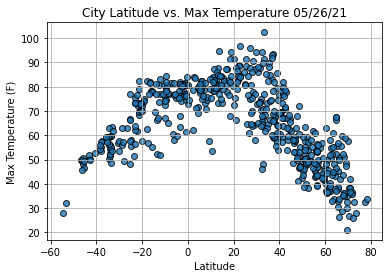

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

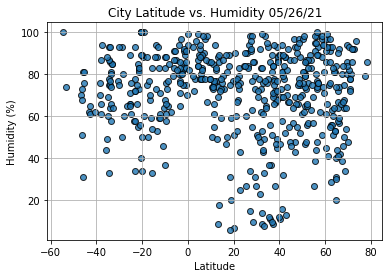

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

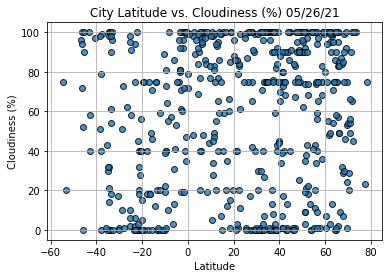

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

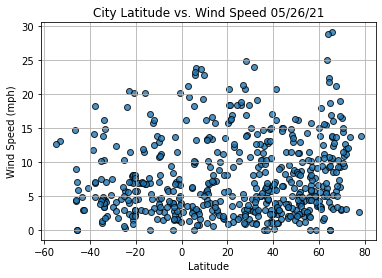

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-05-26 23:51:04
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    75.42
Humidity                       72
Cloudiness                     94
Wind Speed                  20.45
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
532     True
533     True
534     True
535    False
536     True
Name: Lat, Length: 537, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

City Country                 Date      Lat       Lng  Max Temp  \
0     Albany      US  2021-05-26 23:50:13  42.6001  -73.9662     71.02   
3       Faya      SA  2021-05-26 23:51:00  18.3851   42.4509     68.11   
5       Ayan      RU  2021-05-26 23:51:01  56.4500  138.1667     39.40   
6   Catalina      US  2021-05-26 23:51:01  32.5056 -110.9211     94.23   
8  Tazovskiy      RU  2021-05-26 23:51:02  67.4667   78.7000     28.63   

   Humidity  Cloudiness  Wind Speed  
0        88          68        4.00  
3        31           1        1.66  
5        77          56       10.20  
6         9          71        1.01  
8        80          32        5.75

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
northern_hemi_df.head()

City Country                 Date      Lat       Lng  Max Temp  \
0     Albany      US  2021-05-26 23:50:13  42.6001  -73.9662     71.02   
3       Faya      SA  2021-05-26 23:51:00  18.3851   42.4509     68.11   
5       Ayan      RU  2021-05-26 23:51:01  56.4500  138.1667     39.40   
6   Catalina      US  2021-05-26 23:51:01  32.5056 -110.9211     94.23   
8  Tazovskiy      RU  2021-05-26 23:51:02  67.4667   78.7000     28.63   

   Humidity  Cloudiness  Wind Speed  
0        88          68        4.00  
3        31           1        1.66  
5        77          56       10.20  
6         9          71        1.01  
8        80          32        5.75

In [27]:
southern_hemi_df.head()

City Country                 Date      Lat       Lng  Max Temp  \
1       Hobart      AU  2021-05-26 23:50:28 -42.8794  147.3294     50.25   
2       Rawson      AR  2021-05-26 23:50:51 -43.3002  -65.1023     51.94   
4  Port Alfred      ZA  2021-05-26 23:51:00 -33.5906   26.8910     59.58   
7  Henties Bay      NA  2021-05-26 23:51:01 -22.1160   14.2845     61.86   
9    Hithadhoo      MV  2021-05-26 23:51:02  -0.6000   73.0833     83.82   

   Humidity  Cloudiness  Wind Speed  
1        65          40        3.00  
2        62         100        4.79  
4        81          90        4.34  
7        66           0        7.09  
9        70         100       20.13

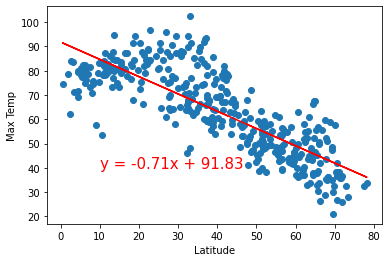

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

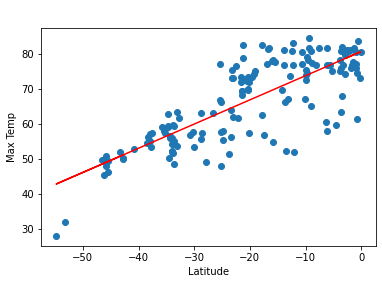

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

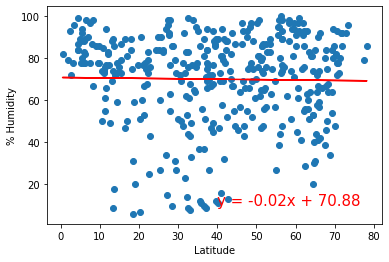

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

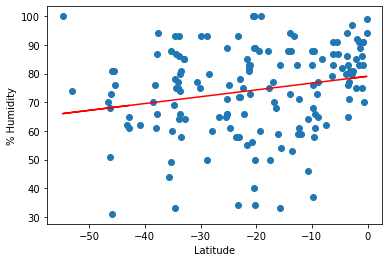

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

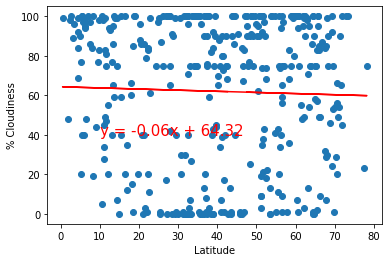

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness',(10,40))

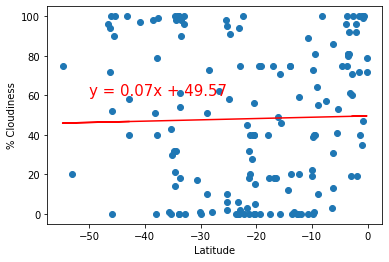

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

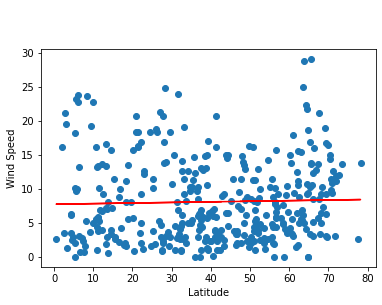

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

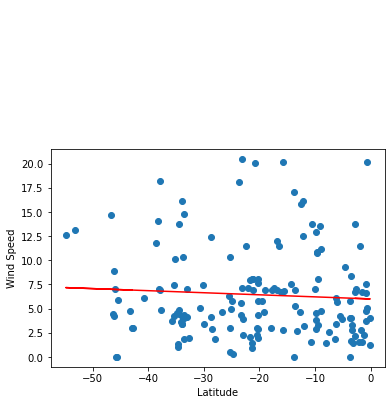

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))